### Imbalanced data set

A data set, in which classes/categories are not equally represented
For ex : in a binary classification problem, we might get a data set where 90% of data belongs to Class A, and 10% to other, in this case the ML model might get biased towards Class A. Thats why we handle imbalanced data set

#### __Two Methods__
- Up sampling
- Down sampling

#### ___Up Sampling___

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

In [13]:
np.random.seed(123)
#1️⃣ Seed Value = Starting Point
#The same seed always gives the same random sequence.
#Different seed values produce different sequences.

In [14]:
total_sample = 1000     #Total number of samples
Class_0_ratio = 0.9     #Ratio of class_0 samples
n_class_0 = int(total_sample*Class_0_ratio)      #Number of class_0 samples
n_class_1 = total_sample - n_class_0             #Number of class_1 samples

In [42]:
class_0 = pd.DataFrame({
    # Creating a normal distribution
    'Feature_1' : np.random.normal(loc=0,scale=1,size=n_class_0),      # Creating feature_1 with mean(loc)=0, std(scale)=1
    'Feature_2' : np.random.normal(loc=0,scale=1,size=n_class_0),      # Creating feature_2 with mean(loc)=0, std(scale)=1
    'Target' : [0]*n_class_0                                           # Creating target variable with 0
})
class_0.head()

,Feature_1,Feature_2,Target
0,-1.060012,-0.889345,0
1,-0.256019,0.981941,0
2,-0.370281,-0.072355,0
3,0.629578,1.157476,0
4,-1.562030,-0.049167,0


<Axes: xlabel='Feature_1', ylabel='Count'>

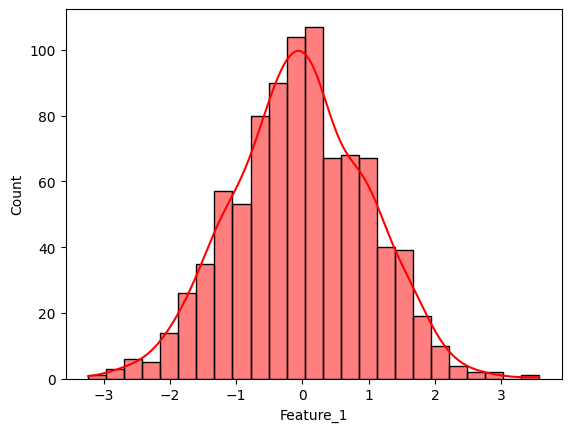

In [24]:
sns.histplot(class_0['Feature_1'], kde=True, color='red')

In [ ]:

class_1 = pd.DataFrame({
    'Feature_1' : np.random.normal(loc=2,scale=1,size=n_class_1),      # Creating feature_1 with mean(loc)=2, std(scale)=1
    'Feature_2' : np.random.normal(loc=2,scale=1,size=n_class_1),      # Creating feature_2 with mean(loc)=2, std(scale)=1
    'Target' : [1]*n_class_1                                           # Creating target variable with 1
})
class_1.head()


,Feature_1,Feature_2,Target
0,1.869528,4.301112,1
1,2.421849,2.339059,1
2,1.066768,1.955683,1
3,3.446001,1.286749,1
4,3.050432,1.734893,1


<Axes: xlabel='Feature_1', ylabel='Count'>

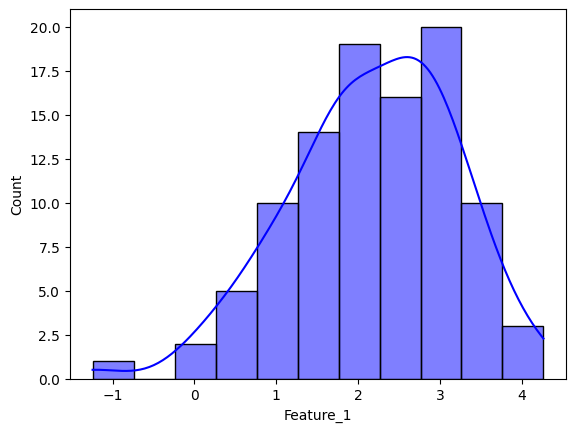

In [31]:
sns.histplot(class_1['Feature_1'], kde=True, color='blue')

In [ ]:
df = pd.concat([class_0, class_1], axis=0).reset_index(drop=True)   # Horizontal Concatenation

,Feature_1,Feature_2,Target
0,-1.060012,-0.889345,0
1,-0.256019,0.981941,0
2,-0.370281,-0.072355,0
3,0.629578,1.157476,0
4,-1.562030,-0.049167,0


In [46]:
df.head()

,Feature_1,Feature_2,Target
0,-1.060012,-0.889345,0
1,-0.256019,0.981941,0
2,-0.370281,-0.072355,0
3,0.629578,1.157476,0
4,-1.562030,-0.049167,0


In [47]:
df.tail()

,Feature_1,Feature_2,Target
995,2.179395,1.355978,1
996,2.811401,1.832334,1
997,1.723752,0.489250,1
998,2.822727,1.585277,1
999,0.622904,3.495752,1


<Axes: xlabel='Feature_1', ylabel='Count'>

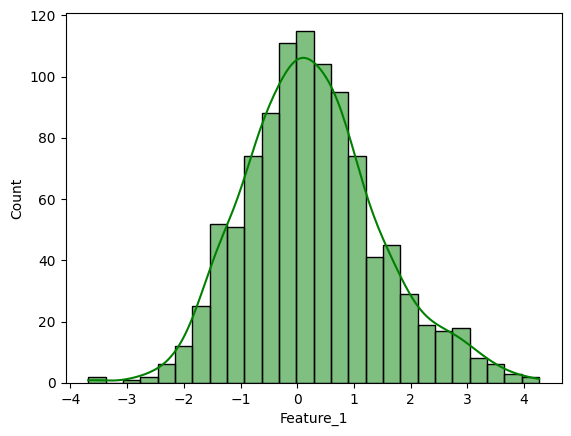

In [ ]:
sns.histplot(df['Feature_1'], kde=True, color='green')
# Note that, the peak is between 0-1, that means the data is biased towards class_0 more than class_1

### __Upsampling__

In [56]:
from sklearn.utils import resample

In [ ]:
# Check this
df_majority = df[df['Target']==0]
df_minority = df[df['Target']==1]
print(df_majority.shape)
print(df_minority.shape)

# We gonna upsample the minority class

(900, 3)
(100, 3)


In [65]:
df.value_counts('Target')   # o/p = 900 0s and 100 1s

Target
0    900
1    100
Name: count, dtype: int64

In [59]:
df_minority_upsampled = resample(
    df_minority,                   # Dataframe to upsample
    replace=True,                  # Sample with replacement
    n_samples=n_class_0,           # making number of samples (after sampling) = number of majority class
    random_state=123               # using seed = 123 (as we used before)
    )

df_minority_upsampled.shape

(900, 3)

In [64]:
upsampled_df = pd.concat([df_majority,df_minority_upsampled],axis = 0)
upsampled_df.shape

(1800, 3)

In [66]:
upsampled_df.value_counts('Target')   # o/p = 900 0s and 900 1s

Target
0    900
1    900
Name: count, dtype: int64

### __Downsampling__

In [ ]:
# creating data again
class_0 = pd.DataFrame({
    # Creating a normal distribution
    'Feature_1' : np.random.normal(loc=0,scale=1,size=n_class_0),      # Creating feature_1 with mean(loc)=0, std(scale)=1
    'Feature_2' : np.random.normal(loc=0,scale=1,size=n_class_0),      # Creating feature_2 with mean(loc)=0, std(scale)=1
    'Target' : [0]*n_class_0                                           # Creating target variable with 0
})
class_1 = pd.DataFrame({
    'Feature_1' : np.random.normal(loc=2,scale=1,size=n_class_1),      # Creating feature_1 with mean(loc)=2, std(scale)=1
    'Feature_2' : np.random.normal(loc=2,scale=1,size=n_class_1),      # Creating feature_2 with mean(loc)=2, std(scale)=1
    'Target' : [1]*n_class_1                                           # Creating target variable with 1
})

df = pd.concat([class_0,class_1]).reset_index(drop = True)
df

,Feature_1,Feature_2,Target
0,-1.363852,1.337404,0
1,-0.594763,-1.686673,0
2,1.143791,1.258680,0
3,-1.097533,-0.302534,0
4,-0.462095,0.881215,0
...,...,...,...
995,0.948647,1.951856,1
996,1.955693,3.157310,1
997,2.415231,2.721948,1
998,2.576171,1.741983,1


In [71]:
df_majority = df[df['Target']==0]
df_minority = df[df['Target']==1]
print(df_majority.shape)
print(df_minority.shape)

(900, 3)
(100, 3)


In [74]:
df_majority_downsampled = resample(
    df_majority,
    n_samples=n_class_1,
    replace=False,
    random_state=123
    )

df_majority_downsampled.shape

(100, 3)

In [75]:
downsampled_df = pd.concat([df_majority_downsampled,df_minority],axis=0)
downsampled_df.shape

(200, 3)

In [76]:
downsampled_df.value_counts('Target')

Target
0    100
1    100
Name: count, dtype: int64